Error: 0.410979798447985
MSE: 0.16890439473234636
RMSE: 0.16890439473234636


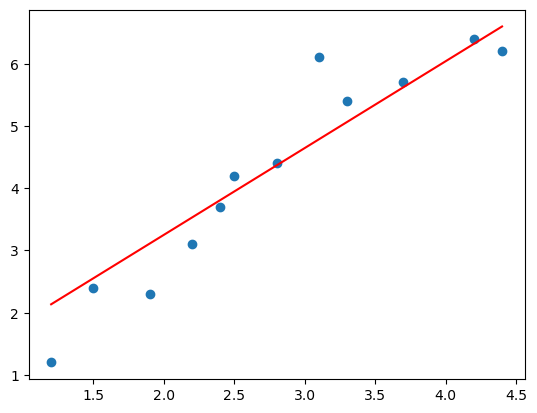

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Y=np.array([1.2,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2])
X=np.array([1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4])

def get_errors(y_pred, y):
    error = np.mean(abs(y_pred - y))
    mse = np.mean(error ** 2)
    rmse = np.sqrt(mse ** 2)
    print(f"Error: {error}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    return error, mse, rmse

def gradient_descent(x, y, r, epochs):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []
    slopes=[]
    for i in range(epochs):
        for j in range(len(x)):
            y_hat = b1*x[j] + b0
            error = y_hat - y[j]
            b0 -= error * r
            b1 -= error * r * x[j]
            costs.append(np.sqrt(np.mean(((b1*x + b0) - y) ** 2)))
            slopes.append(b1)
    y_pred = b1*x + b0
    get_errors(y_pred, y)
    return costs,y_pred,slopes
        
costs, y_pred,_= gradient_descent(X, Y, 0.01, 5)
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')

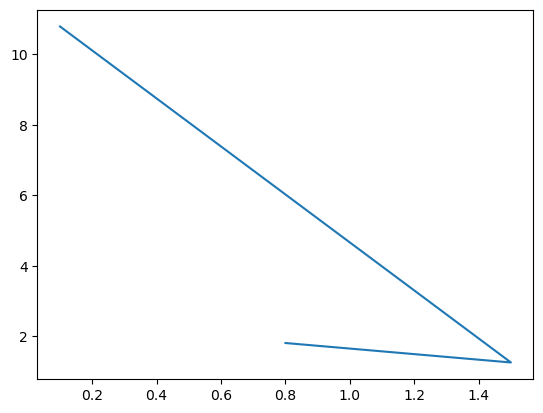

In [2]:
mse_a = []
b = [0.1, 1.5, 0.8]
for b1 in b:
    mse_a.append(np.mean(((b1*X + 1.1) - Y) ** 2))
plt.plot(b, mse_a)

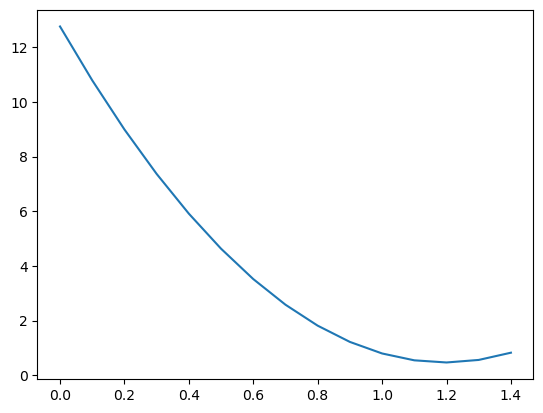

In [3]:
vals=[]
b=[]
b1=0
while b1<=1.5:
    vals.append(np.mean(((b1*X + 1.1) - Y) ** 2))
    b.append(b1)
    b1+=0.1
plt.plot(b, vals)

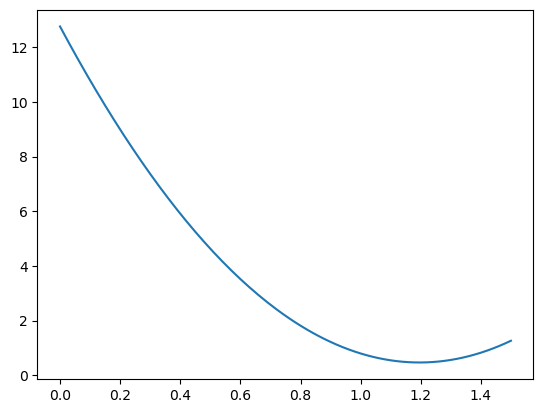

In [4]:
mse_a = []
b = np.arange(0, 1.51, 0.01)
for b1 in b:
    mse_a.append(np.mean(((b1*X + 1.1) - Y) ** 2))
plt.plot(b, mse_a)

In [5]:
from sklearn.linear_model import SGDRegressor
X_reshaped = X.reshape(-1, 1)
sgd = SGDRegressor(max_iter=60, eta0=0.01)
sgd.fit(X_reshaped, Y)
sk_pred = sgd.predict(X_reshaped)
get_errors(sk_pred, Y)

Error: 0.4023391765595948
MSE: 0.16187681299465279
RMSE: 0.16187681299465279


(0.4023391765595948, 0.16187681299465279, 0.16187681299465279)

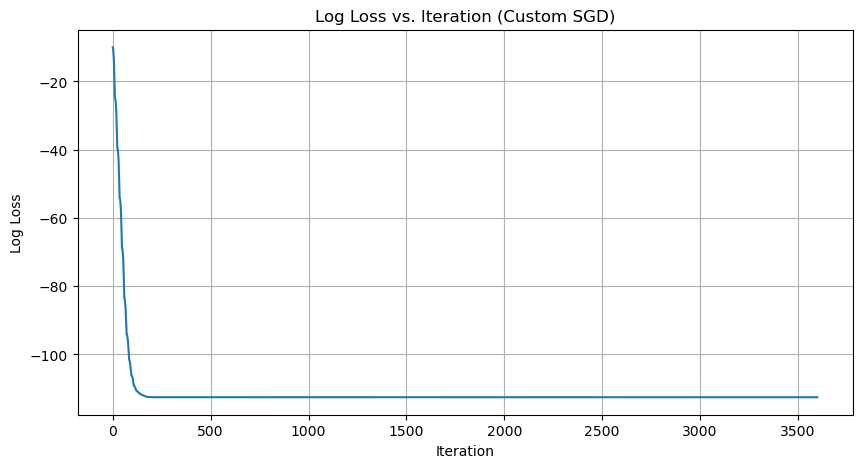

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y=sigmoid(Y)

def log_loss(y_true, y_pred):
    epsilon = 1e-15 
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def logistic_regression_sgd(X, y, learning_rate, epochs, max_iter):
    b0 = np.random.rand()
    b1 = np.random.rand()
    costs = []
    for epoch in range(epochs):
        for _ in range(max_iter):
            for i in range(len(X)):
                z = b0 + b1 * X[i]
                y_pred = sigmoid(z)
                error = y_pred - y[i]
                b0 -= learning_rate * error
                b1 -= learning_rate * error * X[i]
                y_preds = sigmoid(b0 + b1 * X.reshape(-1))
                cost = log_loss(y, y_preds)
                costs.append(cost)
    return b0, b1, costs
b0, b1, costs = logistic_regression_sgd(X_reshaped, Y, learning_rate=0.01, epochs=5, max_iter=60)
plt.figure(figsize=(10, 5))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iteration (Custom SGD)')
plt.grid(True)
plt.show()


Error: 0.6214696661641356
MSE: 0.3862245459621621
RMSE: 0.3862245459621621
Error: 3.793788486571784
MSE: 14.392831080844626
RMSE: 14.392831080844626


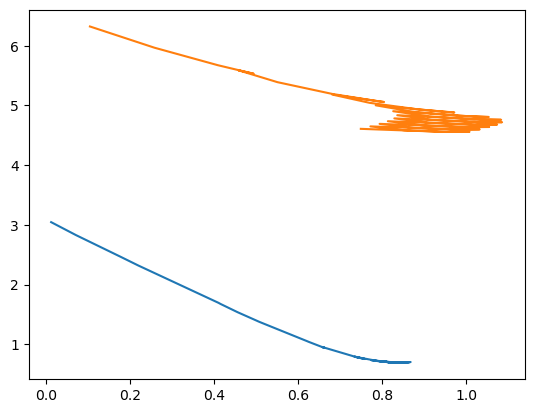

In [7]:
x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])
costs_p, y_pred_p, slopes_p = gradient_descent(x_pos, y_pos, 0.01, 10)
plt.plot(slopes_p, costs_p)
costs_p, y_pred_p, slopes_p = gradient_descent(x_neg, y_neg, 0.01, 10)
plt.plot(slopes_p, costs_p)

Error: 0.27289651799285236
MSE: 0.07447250953262319
RMSE: 0.07447250953262319
Error: 1.1766647259851608
MSE: 1.3845398773777335
RMSE: 1.3845398773777335


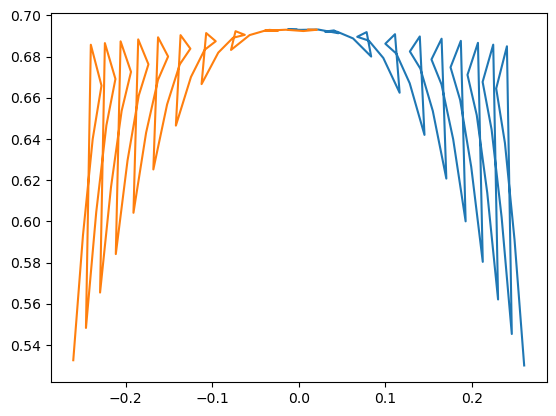

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def logistic_regression(X, y, alpha, epochs):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []
    slopes = []
    
    for i in range(epochs):
        for j in range(len(X)):
            y_hat = sigmoid(b1*X[j] + b0)
            error = y_hat - y[j]
            b0 -= error * alpha
            b1 -= error * alpha * X[j]
            log_loss = -np.mean(y_hat*np.log(y_hat) + (1-y_hat)*np.log(1-y_hat))
            costs.append(log_loss)
            slopes.append(b1)
    
    y_pred = b1*X + b0
    get_errors(y_pred, y)
    
    return costs, y_pred, slopes
x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])
costs_p, y_pred_p, slopes_p = logistic_regression(x_pos, y_pos, 0.01, 10)
plt.plot(slopes_p, costs_p)
costs_n, y_pred_n, slopes_n = logistic_regression(x_neg, y_neg, 0.01, 10)
plt.plot(slopes_n, costs_n)